# 互联网金融风控中的用户贷款欺诈风险发现（基于lending club数据集）1-数据预处理

> author: chen_by(凉薄)

> date: 2018/2/2

# 1. 读取数据

Lending Club 2016年Q4-2017年Q3数据： https://www.lendingclub.com/info/download-data.action

随着互联网技术的不断发展，尤其是近些年大数据和云计算技术的快速崛起，互联网行业不断地渗透到传统行业，金融行业首当其冲，于是互联网金融风生水起。在传统金融行业，金融是用于融通资金，使得资源得到最合理的配置；而互联网则是一个高效的技术媒介，任何交易自动完成，可以让交易的边界成本趋向于“零”。传统的金融和互联网技术相结合，利用大数据、云计算等技术的大规模、分布式快速计算，能够实现快速资金融通、支付、投资和信息中介服务。随着人工智能技术的发展，我们又可以利用分布式计算、GPU等强大的硬件基础和大规模的数据储备，发掘数据中隐藏的价值，实现企业成本最低化，效率最大化和效益的最大化。

Lending Club是美国的一家P2P企业，该公司提供了大量信贷数据可供下载，本项目将利用2016年Q4到2017年Q3的数据进行数据分析和挖掘，评估用户的贷款欺诈风险。

本文是该项目的数据预处理阶段（数据清洗）。主要包括对属性字段的全面理解，删除无用的属性，对属性进行适当变换处理等，使得最终进入建模的数据集更加干净。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_2016Q4 = pd.read_csv('./LoanStats_2016Q4.csv', skiprows=1, skip_footer=4)
df_2017Q1 = pd.read_csv('./LoanStats_2017Q1.csv', skiprows=1, skip_footer=4)
df_2017Q2 = pd.read_csv('./LoanStats_2017Q2.csv', skiprows=1, skip_footer=4)
df_2017Q3 = pd.read_csv('./LoanStats_2017Q3.csv', skiprows=1, skip_footer=4)

In [3]:
print(df_2016Q4.info())
print('----------------')
print(df_2017Q1.info())
print('----------------')
print(df_2017Q2.info())
print('----------------')
print(df_2017Q3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103546 entries, 0 to 103545
Columns: 145 entries, id to settlement_term
dtypes: float64(55), int64(53), object(37)
memory usage: 114.5+ MB
None
----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96779 entries, 0 to 96778
Columns: 145 entries, id to settlement_term
dtypes: float64(55), int64(53), object(37)
memory usage: 107.1+ MB
None
----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105451 entries, 0 to 105450
Columns: 145 entries, id to settlement_term
dtypes: float64(56), int64(52), object(37)
memory usage: 116.7+ MB
None
----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122701 entries, 0 to 122700
Columns: 145 entries, id to settlement_term
dtypes: float64(56), int64(52), object(37)
memory usage: 135.7+ MB
None


In [4]:
#DataFrame Concatenation
df = pd.concat([df_2016Q4, df_2017Q1, df_2017Q2, df_2017Q3], axis=0) 
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428477 entries, 0 to 122700
Data columns (total 145 columns):
id                                            float64
member_id                                     float64
loan_amnt                                     int64
funded_amnt                                   int64
funded_amnt_inv                               int64
term                                          object
int_rate                                      object
installment                                   float64
grade                                         object
sub_grade                                     object
emp_title                                     object
emp_length                                    object
home_ownership                                object
annual_inc                                    float64
verification_status                           object
issue_d                                       object
loan_status                            

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,14400,14400,14400,60 months,7.99%,291.92,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,4500,4500,4500,36 months,12.74%,151.06,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3600,3600,3600,36 months,11.39%,118.53,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,7000,7000,7000,36 months,5.32%,210.81,A,A1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,12000,12000,12000,36 months,16.99%,427.78,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


# 2. 数据预处理：深入到数据每一项

1. 删除全行、全列为NaN值的行和列

2. 去除与预测目标无关的指标（如，含有太多取值的类别变量， 贷后属性等）

3. 删除高度相关的变量



##  2.1 删除全为nan的行和列

In [6]:
df.dropna(axis=0, how='all', inplace=True)
df.dropna(axis=1, how='all', inplace=True)

##  2.2 int_rate

In [7]:
df.iloc[0:5, 0:10]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length
0,14400,14400,14400,60 months,7.99%,291.92,A,A5,Senior Director,9 years
1,4500,4500,4500,36 months,12.74%,151.06,C,C1,Lead machine operator,6 years
2,3600,3600,3600,36 months,11.39%,118.53,B,B3,IT Specialist 6,10+ years
3,7000,7000,7000,36 months,5.32%,210.81,A,A1,Nurse,2 years
4,12000,12000,12000,36 months,16.99%,427.78,D,D1,NaN,n/a


In [8]:
df.int_rate = pd.Series(df.int_rate).str.replace('%', '').astype(float)

In [9]:
df.iloc[:5, :10]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length
0,14400,14400,14400,60 months,7.99,291.92,A,A5,Senior Director,9 years
1,4500,4500,4500,36 months,12.74,151.06,C,C1,Lead machine operator,6 years
2,3600,3600,3600,36 months,11.39,118.53,B,B3,IT Specialist 6,10+ years
3,7000,7000,7000,36 months,5.32,210.81,A,A1,Nurse,2 years
4,12000,12000,12000,36 months,16.99,427.78,D,D1,NaN,n/a


## 2.3 贷款申请额（loan_amnt）和放贷金额（funded_amnt）

In [10]:
# 贷款申请额与放贷金额
print((df.loan_amnt != df.funded_amnt).value_counts())

False    428477
dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428477 entries, 0 to 122700
Columns: 142 entries, loan_amnt to settlement_term
dtypes: float64(53), int64(52), object(37)
memory usage: 467.5+ MB


## 2.4 emp_title和emp_length

In [12]:
# emp_title
print(df.emp_title.value_counts().head())
print(df.emp_title.value_counts().tail())
print(len(df.emp_title.unique()))

Teacher             8159
Manager             7318
Owner               5422
Driver              3393
Registered Nurse    3291
Name: emp_title, dtype: int64
IT/AV Director                    1
ESOL Program Director             1
Business Operations Consultant    1
FRONT OFFICE ASSISTANT            1
school bus driver/trainer         1
Name: emp_title, dtype: int64
118744


In [13]:
df.drop('emp_title', axis=1, inplace=True)

In [14]:
# emp_length
df.emp_length.value_counts()

10+ years    143953
2 years       39545
< 1 year      38397
3 years       34353
n/a           29026
1 year        28136
4 years       26002
5 years       25956
6 years       18746
9 years       15540
7 years       14939
8 years       13884
Name: emp_length, dtype: int64

In [15]:
df.replace(to_replace='n/a', value=np.nan, inplace=True)
df.emp_length.fillna(0, inplace=True)
df['emp_length'].replace(to_replace='[^0-9]+', value='', regex=True, inplace=True)
df['emp_length'] = df['emp_length'].astype(np.int64)

In [16]:
df.emp_length.value_counts()

10    143953
1      66533
2      39545
3      34353
0      29026
4      26002
5      25956
6      18746
9      15540
7      14939
8      13884
Name: emp_length, dtype: int64

In [17]:
df.iloc[0:5, 9:20]

,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state
0,MORTGAGE,135000.0,Not Verified,Dec-2016,Current,n,NaN,home_improvement,Home improvement,070xx,NJ
1,RENT,32000.0,Not Verified,Dec-2016,Current,n,NaN,credit_card,Credit card refinancing,531xx,WI
2,RENT,89712.0,Not Verified,Dec-2016,Current,n,NaN,credit_card,Credit card refinancing,984xx,WA
3,RENT,85000.0,Not Verified,Dec-2016,Current,n,NaN,debt_consolidation,Debt consolidation,112xx,NY
4,RENT,30000.0,Not Verified,Dec-2016,Current,n,NaN,credit_card,Credit card refinancing,982xx,WA


## 2.5 home_ownership, verification_status

In [18]:
# home_ownership
df.home_ownership.value_counts()

MORTGAGE    210832
RENT        167851
OWN          49292
ANY            498
NONE             4
Name: home_ownership, dtype: int64

In [19]:
# verification_status: indicates if income was veirified by LC, not verified, or if the income source was verified
df.verification_status.value_counts()

Source Verified    165165
Not Verified       147234
Verified           116078
Name: verification_status, dtype: int64

## 2.6 object属性

In [20]:
# 考察属性取值的对象‘object’的属性
for col in df.select_dtypes(include=['object']).columns:
    print('Column {} has {} unique instances.'.format(col, len(df[col].unique())))

Column term has 2 unique instances.
Column grade has 7 unique instances.
Column sub_grade has 35 unique instances.
Column home_ownership has 5 unique instances.
Column verification_status has 3 unique instances.
Column issue_d has 12 unique instances.
Column loan_status has 7 unique instances.
Column pymnt_plan has 2 unique instances.
Column desc has 2 unique instances.
Column purpose has 13 unique instances.
Column title has 13 unique instances.
Column zip_code has 889 unique instances.
Column addr_state has 49 unique instances.
Column earliest_cr_line has 674 unique instances.
Column revol_util has 1155 unique instances.
Column initial_list_status has 2 unique instances.
Column last_pymnt_d has 16 unique instances.
Column next_pymnt_d has 4 unique instances.
Column last_credit_pull_d has 18 unique instances.
Column application_type has 2 unique instances.
Column verification_status_joint has 4 unique instances.
Column sec_app_earliest_cr_line has 565 unique instances.
Column hardship

In [21]:
# 统计各个属性的缺失值占比
df.select_dtypes(include=['object']).describe().T.assign(missing_pct=df.apply(lambda x: (len(x) - x.count()) / float(len(x))))

,count,unique,top,freq,missing_pct
term,428477,2,36 months,316682,0.000000
grade,428477,7,C,147869,0.000000
sub_grade,428477,35,C1,33873,0.000000
home_ownership,428477,5,MORTGAGE,210832,0.000000
verification_status,428477,3,Source Verified,165165,0.000000
issue_d,428477,12,Aug-2017,43573,0.000000
loan_status,428477,7,Current,360626,0.000000
pymnt_plan,428477,2,n,428283,0.000000
desc,1,1,"To whom it may concern, Hello, my name is ...",1,0.999998
purpose,428477,13,debt_consolidation,242378,0.000000


In [22]:
# revol_util
df.revol_util = pd.Series(df.revol_util).str.replace('%', '').astype(np.float)

In [23]:
# 删除缺失值过多的属性
df.drop(['sub_grade', 'desc', 'verification_status_joint', 'sec_app_earliest_cr_line'], axis=1, inplace=True)
df.drop(['hardship_type', 'hardship_reason', 'hardship_reason', 'hardship_status', 'hardship_start_date', 'hardship_end_date', 
        'payment_plan_start_date', 'hardship_loan_status'], axis=1, inplace=True)
df.drop(['debt_settlement_flag_date', 'settlement_status', 'settlement_date'], axis=1, inplace=True)

In [24]:
# 删除无用的属性（zip_code, addr_state, 日期等）
df.drop(['zip_code', 'issue_d', 'addr_state', 'earliest_cr_line', 'purpose', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'],
    axis=1, inplace=True)

In [25]:
# 删除贷后属性
df.drop(['debt_settlement_flag'], axis=1, inplace=True)
df.drop(['hardship_flag'], axis=1, inplace=True)

In [26]:
df.select_dtypes(include=['object']).describe().T.assign(missing_pct=df.apply(lambda x: (len(x) - x.count()) / float(len(x))))

,count,unique,top,freq,missing_pct
term,428477,2,36 months,316682,0.000000
grade,428477,7,C,147869,0.000000
home_ownership,428477,5,MORTGAGE,210832,0.000000
verification_status,428477,3,Source Verified,165165,0.000000
loan_status,428477,7,Current,360626,0.000000
pymnt_plan,428477,2,n,428283,0.000000
title,428473,12,Debt consolidation,242379,0.000009
initial_list_status,428477,2,w,321490,0.000000
application_type,428477,2,Individual,399127,0.000000
disbursement_method,428477,2,Cash,428152,0.000000


In [27]:
df.title.fillna('unknown', inplace=True)

In [28]:
df.title.unique()

array(['Home improvement', 'Credit card refinancing',
       'Debt consolidation', 'Other', 'Business', 'Car financing',
       'Medical expenses', 'Major purchase', 'Moving and relocation',
       'Vacation', 'Home buying', 'Green loan', 'unknown'], dtype=object)

## 2.7 int属性

In [29]:
df.select_dtypes(include=['int64']).describe().T.assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,mean,std,min,25%,50%,75%,max,missing_pct
loan_amnt,428477.0,14546.702682,9439.421960,1000.0,7200.0,12000.0,20000.0,40000.0,0.0
funded_amnt,428477.0,14546.702682,9439.421960,1000.0,7200.0,12000.0,20000.0,40000.0,0.0
funded_amnt_inv,428477.0,14542.279749,9436.828722,950.0,7200.0,12000.0,20000.0,40000.0,0.0
emp_length,428477.0,5.577851,3.809248,0.0,2.0,5.0,10.0,10.0,0.0
delinq_2yrs,428477.0,0.356610,0.955423,0.0,0.0,0.0,0.0,42.0,0.0
inq_last_6mths,428477.0,0.519638,0.819044,0.0,0.0,0.0,1.0,5.0,0.0
open_acc,428477.0,11.745877,5.781507,0.0,8.0,11.0,15.0,97.0,0.0
pub_rec,428477.0,0.240624,0.641106,0.0,0.0,0.0,0.0,61.0,0.0
revol_bal,428477.0,16452.394770,22723.867640,0.0,5869.0,11061.0,19781.0,1698749.0,0.0
total_acc,428477.0,23.711060,11.871199,2.0,15.0,22.0,30.0,151.0,0.0


In [30]:
# 删除无用的属性（与预测目标无关，贷后属性）
df.drop(['policy_code'], axis=1, inplace=True)

## 2.8 float属性

In [31]:
df.select_dtypes(include=['float64']).describe().T.assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,mean,std,min,25%,50%,75%,max,missing_pct
int_rate,428477.0,13.446845,5.150999,5.320000e+00,10.420,12.74,15.990,3.099000e+01,0.000000
installment,428477.0,438.907029,281.704941,3.012000e+01,234.580,361.83,586.540,1.719830e+03,0.000000
annual_inc,428477.0,80629.864101,206671.198068,0.000000e+00,48000.000,67000.00,96000.000,1.100000e+08,0.000000
dti,428157.0,19.047510,15.472657,-1.000000e+00,12.270,18.15,24.640,9.990000e+02,0.000747
mths_since_last_delinq,222826.0,33.418093,21.855677,0.000000e+00,15.000,30.00,49.000,1.950000e+02,0.479958
mths_since_last_record,79346.0,70.513447,25.401231,0.000000e+00,54.000,74.00,89.000,1.200000e+02,0.814819
revol_util,428141.0,49.325464,24.364063,0.000000e+00,30.700,48.80,67.800,1.732000e+02,0.000784
out_prncp,428477.0,10779.903991,8851.056473,0.000000e+00,4055.720,8914.42,15711.950,4.000000e+04,0.000000
out_prncp_inv,428477.0,10776.848771,8849.081417,0.000000e+00,4053.860,8913.81,15701.000,4.000000e+04,0.000000
total_pymnt,428477.0,4656.212844,5550.797327,0.000000e+00,1506.240,2901.68,5473.100,5.066918e+04,0.000000


In [32]:
# 删除缺失过多的属性
df.drop(['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 
         'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_inq_last_6mths', 'sec_app_mort_acc',
         'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
         'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'deferral_term', 'hardship_amount', 'hardship_length',
         'hardship_dpd', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 
         'settlement_amount', 'settlement_percentage', 'settlement_term'], axis=1, inplace=True)

In [33]:
df.select_dtypes(include=['float64']).describe().T.assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,mean,std,min,25%,50%,75%,max,missing_pct
int_rate,428477.0,13.446845,5.150999,5.320000e+00,10.42,12.74,15.99,3.099000e+01,0.000000
installment,428477.0,438.907029,281.704941,3.012000e+01,234.58,361.83,586.54,1.719830e+03,0.000000
annual_inc,428477.0,80629.864101,206671.198068,0.000000e+00,48000.00,67000.00,96000.00,1.100000e+08,0.000000
dti,428157.0,19.047510,15.472657,-1.000000e+00,12.27,18.15,24.64,9.990000e+02,0.000747
revol_util,428141.0,49.325464,24.364063,0.000000e+00,30.70,48.80,67.80,1.732000e+02,0.000784
out_prncp,428477.0,10779.903991,8851.056473,0.000000e+00,4055.72,8914.42,15711.95,4.000000e+04,0.000000
out_prncp_inv,428477.0,10776.848771,8849.081417,0.000000e+00,4053.86,8913.81,15701.00,4.000000e+04,0.000000
total_pymnt,428477.0,4656.212844,5550.797327,0.000000e+00,1506.24,2901.68,5473.10,5.066918e+04,0.000000
total_pymnt_inv,428477.0,4654.613203,5548.918102,0.000000e+00,1505.55,2900.77,5470.42,5.066918e+04,0.000000
total_rec_prncp,428477.0,3522.068277,5165.345903,0.000000e+00,961.38,1838.22,3621.74,4.000000e+04,0.000000


In [34]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428477 entries, 0 to 122700
Data columns (total 89 columns):
loan_amnt                     428477 non-null int64
funded_amnt                   428477 non-null int64
funded_amnt_inv               428477 non-null int64
term                          428477 non-null object
int_rate                      428477 non-null float64
installment                   428477 non-null float64
grade                         428477 non-null object
emp_length                    428477 non-null int64
home_ownership                428477 non-null object
annual_inc                    428477 non-null float64
verification_status           428477 non-null object
loan_status                   428477 non-null object
pymnt_plan                    428477 non-null object
title                         428477 non-null object
dti                           428157 non-null float64
delinq_2yrs                   428477 non-null int64
inq_last_6mths                428477 non-n

## 2.9 Targer: Loan Status

In [35]:
loan_status_stats = df.loan_status.value_counts()
loan_status_df = pd.DataFrame(loan_status_stats)
loan_status_df

,loan_status
Current,360626
Fully Paid,46989
Late (31-120 days),7588
Charged Off,7408
In Grace Period,3717
Late (16-30 days),2142
Default,7


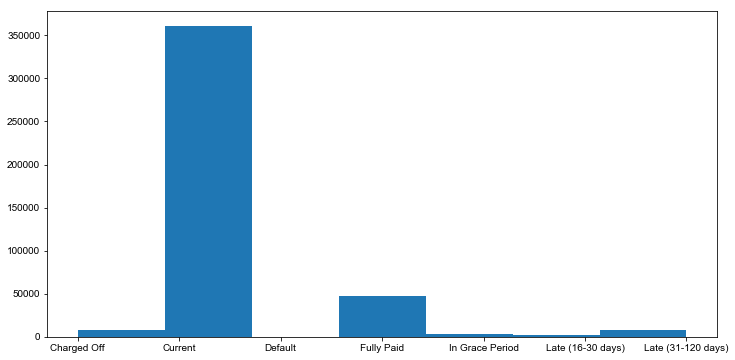

In [36]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
sns.set_style('white')
sns.set_style('ticks')
ax.hist(df.loan_status, bins=7, histtype='stepfilled')
plt.savefig('loan_status.png')

In [37]:
df.loan_status.replace('Current',int(1), inplace=True)
df.loan_status.replace('Fully Paid',int(1), inplace=True)
df.loan_status.replace('Late (31-120 days)',int(0), inplace=True)
df.loan_status.replace('Late (16-30 days)',int(0), inplace=True)
df.loan_status.replace('Charged Off',np.nan, inplace=True)
df.loan_status.replace('In Grace Period',np.nan, inplace=True)
df.loan_status.replace('Default',np.nan, inplace=True)

In [38]:
df.loan_status.value_counts()

1.0    407615
0.0      9730
Name: loan_status, dtype: int64

In [39]:
df.dropna(subset=['loan_status'],inplace=True)

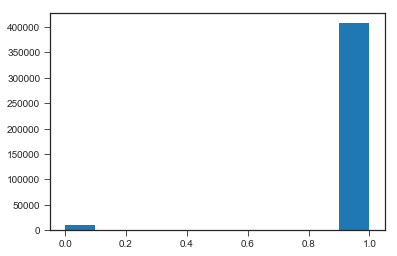

In [40]:
sns.set_style('white')
sns.set_style('ticks')
plt.hist(df.loan_status)
plt.savefig('loan_status_modified.png')

## 2.10 数据降维

考察特征的相关性，删除高度相关的属性（相关系数绝对值大于0.9）。

In [41]:
correlation = df.corr()
len(correlation)

80

In [42]:
correlation[0:40]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.000000,1.000000,0.999995,0.139545,0.949912,0.090660,0.118070,-0.019586,0.048887,-0.004535,...,-0.022904,-0.020126,0.076538,0.037086,-0.062161,0.018333,0.351689,0.285699,0.362171,0.234701
funded_amnt,1.000000,1.000000,0.999995,0.139545,0.949912,0.090660,0.118070,-0.019586,0.048887,-0.004535,...,-0.022904,-0.020126,0.076538,0.037086,-0.062161,0.018333,0.351689,0.285699,0.362171,0.234701
funded_amnt_inv,0.999995,0.999995,1.000000,0.139649,0.949791,0.090704,0.118065,-0.019575,0.048874,-0.004575,...,-0.022922,-0.020146,0.076577,0.037099,-0.062197,0.018308,0.351693,0.285682,0.362158,0.234681
int_rate,0.139545,0.139545,0.139649,1.000000,0.185819,-0.029233,-0.033891,-0.110681,0.105530,0.030113,...,0.022835,0.193847,-0.058092,0.224251,0.065513,0.012855,-0.131533,-0.003824,-0.199652,-0.025390
installment,0.949912,0.949912,0.949791,0.185819,1.000000,0.079343,0.109388,-0.033705,0.052540,0.000667,...,-0.019008,0.006607,0.062926,0.054575,-0.052610,0.023941,0.307383,0.263249,0.328987,0.210421
emp_length,0.090660,0.090660,0.090704,-0.029233,0.079343,1.000000,0.043705,0.011390,-0.034301,0.023335,...,-0.004222,0.033127,-0.016293,0.025990,0.001731,0.013093,0.131691,0.034756,0.079123,0.028080
annual_inc,0.118070,0.118070,0.118065,-0.033891,0.109388,0.043705,1.000000,0.003159,-0.044510,0.011409,...,-0.000047,0.021210,-0.000856,0.000481,-0.016521,0.016803,0.152724,0.120952,0.107529,0.105816
loan_status,-0.019586,-0.019586,-0.019575,-0.110681,-0.033705,0.011390,0.003159,1.000000,-0.012774,-0.014459,...,-0.006143,-0.035397,0.012066,-0.025279,-0.005891,-0.004043,0.017189,-0.002530,0.027186,-0.002624
dti,0.048887,0.048887,0.048874,0.105530,0.052540,-0.034301,-0.044510,-0.012774,1.000000,-0.009254,...,-0.009896,0.032055,0.052858,0.100492,-0.005649,-0.023528,0.025449,0.157526,0.027141,0.182078
delinq_2yrs,-0.004535,-0.004535,-0.004575,0.030113,0.000667,0.023335,0.011409,-0.014459,-0.009254,1.000000,...,0.672429,-0.022241,-0.447794,-0.002668,-0.063810,0.003360,0.050566,0.030700,-0.077722,0.059176


In [43]:
correlation[41:80]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
total_rev_hi_lim,0.338197,0.338197,0.338182,-0.161477,0.307078,0.098056,0.115777,0.022337,0.051471,-0.050715,...,-0.049028,0.117234,0.181617,-0.156004,-0.111919,-0.014868,0.508445,0.429346,0.796558,0.169586
inq_fi,0.003344,0.003344,0.003338,0.144557,0.016640,0.010762,0.020405,-0.030500,0.046710,0.025195,...,0.007466,0.228045,-0.024226,-0.059264,0.067536,0.022103,0.107043,0.106232,-0.042371,0.141637
total_cu_tl,0.074203,0.074203,0.074204,0.015459,0.062464,0.073763,0.018603,-0.009755,0.076462,0.021565,...,-0.001247,0.111296,0.043066,0.008968,0.015277,-0.014375,0.122814,0.118265,-0.019810,0.140412
inq_last_12m,0.009850,0.009850,0.009819,0.179002,0.029775,0.004196,0.026813,-0.041370,0.022990,0.027812,...,0.016426,0.452318,-0.021748,-0.108686,0.092931,0.021500,0.123301,0.117194,-0.000187,0.138102
acc_open_past_24mths,0.006458,0.006458,0.006428,0.200296,0.033101,0.039983,0.025746,-0.039065,0.067584,-0.053325,...,-0.028685,0.764770,0.067619,-0.172312,0.109816,0.019770,0.136533,0.166140,0.110392,0.180929
avg_cur_bal,0.240498,0.240498,0.240522,-0.093102,0.204243,0.091512,0.107146,0.014262,-0.050430,0.034401,...,0.001842,-0.028119,-0.047867,0.074644,-0.074154,0.007000,0.788507,0.299542,0.122515,0.232806
bc_open_to_buy,0.191591,0.191591,0.191579,-0.258040,0.159555,0.033719,0.062882,0.031051,-0.038213,-0.059556,...,-0.044455,0.129069,0.170936,-0.435485,-0.095034,-0.017394,0.276635,0.125636,0.845481,0.092419
bc_util,0.069982,0.069982,0.069982,0.236018,0.089107,0.031661,0.004221,-0.024034,0.113765,0.001390,...,-0.004773,-0.190884,-0.056310,0.844471,-0.009108,-0.004364,-0.009135,0.091629,-0.259539,0.027642
chargeoff_within_12_mths,-0.004454,-0.004454,-0.004464,0.009111,-0.003245,0.005595,0.001443,-0.001730,-0.003315,0.130742,...,0.190562,0.003928,-0.078234,-0.007451,-0.014605,-0.004741,0.002635,-0.003193,-0.017224,0.002446
delinq_amnt,0.003438,0.003438,0.003424,0.002860,0.004197,0.001380,0.002409,-0.000566,-0.004073,0.028808,...,0.037821,-0.003466,-0.010842,-0.006196,-0.004357,0.005074,0.022737,0.003934,0.002858,0.000698


In [44]:
print(df.recoveries.value_counts())
print(df.collection_recovery_fee.value_counts())

0.0    417345
Name: recoveries, dtype: int64
0.0    417345
Name: collection_recovery_fee, dtype: int64


In [45]:
df.drop(['recoveries', 'collection_recovery_fee'], axis=1, inplace=True)

In [46]:
correlation.loc[:, :] = np.tril(correlation, k=-1)
correlation.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
funded_amnt,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
funded_amnt_inv,0.999995,0.999995,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
int_rate,0.139545,0.139545,0.139649,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
installment,0.949912,0.949912,0.949791,0.185819,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
correlation = correlation.stack()
correlation.head()

loan_amnt  loan_amnt          0.0
           funded_amnt        0.0
           funded_amnt_inv    0.0
           int_rate           0.0
           installment        0.0
dtype: float64

In [48]:
correlation[(correlation > 0.55) | (correlation < -0.55)]

funded_amnt                 loan_amnt                1.000000
funded_amnt_inv             loan_amnt                0.999995
                            funded_amnt              0.999995
installment                 loan_amnt                0.949912
                            funded_amnt              0.949912
                            funded_amnt_inv          0.949791
total_acc                   open_acc                 0.732262
out_prncp                   loan_amnt                0.838630
                            funded_amnt              0.838630
                            funded_amnt_inv          0.838678
                            installment              0.764262
out_prncp_inv               loan_amnt                0.838601
                            funded_amnt              0.838601
                            funded_amnt_inv          0.838657
                            installment              0.764138
                            out_prncp                0.999996
total_py

In [49]:
df.drop(['funded_amnt','funded_amnt_inv', 'installment'], axis=1, inplace=True)
df.drop(['out_prncp_inv','total_pymnt_inv', 'total_rec_prncp'], axis=1, inplace=True)
df.drop(['num_sats', 'num_rev_tl_bal_gt_0'], axis=1, inplace=True)
df.drop(['tot_hi_cred_lim', 'total_bal_ex_mort', 'total_il_high_credit_limit'], axis=1, inplace=True)

In [50]:
correlation = df.corr()
correlation.loc[:,:] = np.tril(correlation, k=-1) 
correlation = correlation.stack()
correlation[(correlation > 0.9) | (correlation < -0.9)]

Series([], dtype: float64)

## 2.11 类别变量One_Hot_Encode

In [51]:
# 再次观察object类型的属性，确实属性取值是否存在次序关系
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
term,417345,2,36 months,308839
grade,417345,7,C,144010
home_ownership,417345,5,MORTGAGE,206000
verification_status,417345,3,Source Verified,160789
pymnt_plan,417345,2,n,417152
title,417345,13,Debt consolidation,235843
initial_list_status,417345,2,w,314030
application_type,417345,2,Individual,388587
disbursement_method,417345,2,Cash,417030


In [52]:
# pymnt_plan: 是否已经为贷款设置了付款计划
df.pymnt_plan.unique()

array(['n', 'y'], dtype=object)

In [53]:
# initil_list_status: 贷款的初始上市状态。
df.initial_list_status.unique()

array(['w', 'f'], dtype=object)

In [54]:
# 将pymnt_plan和hardship_flag映射为0和1
df['pymnt_plan'] = df['pymnt_plan'].map({'n': 0, 'y':1})

In [55]:
df.shape

(417345, 76)

In [56]:
# 使用pandas的get_dummies()方法来处理类别变量，对类别变量进行One_Hot Encode
df = pd.get_dummies(df)

In [57]:
df.shape

(417345, 104)

In [58]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417345 entries, 0 to 122700
Data columns (total 104 columns):
loan_amnt                              int64
int_rate                               float64
emp_length                             int64
annual_inc                             float64
loan_status                            float64
pymnt_plan                             int64
dti                                    float64
delinq_2yrs                            int64
inq_last_6mths                         int64
open_acc                               int64
pub_rec                                int64
revol_bal                              int64
revol_util                             float64
total_acc                              int64
out_prncp                              float64
total_pymnt                            float64
total_rec_int                          float64
total_rec_late_fee                     float64
last_pymnt_amnt                        float64
collections_1

In [59]:
df.to_csv('./LoanStats.csv', index=False, encoding='utf-8')